In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from multiprocessing import Pool

## Defining Potential Landscape Function

We start with the Muller-Brown potential, which is a two-dimensional potential energy surface that is commonly used to test optimization algorithms. The potential energy surface is given by the following equation:

$$
V(x, y) = \sum_{i=1}^{4} A_i \exp(a_i(x - x_i)^2 + b_i(x - x_i)(y - y_i) + c_i(y - y_i)^2)
$$

where $A_i$, $a_i$, $b_i$, $c_i$, $x_i$, and $y_i$ are constants. The Muller-Brown potential has four local minima and one global minimum. The global minimum is located at $(0.0898, -0.7126)$ and has a potential energy of $-165.0$.

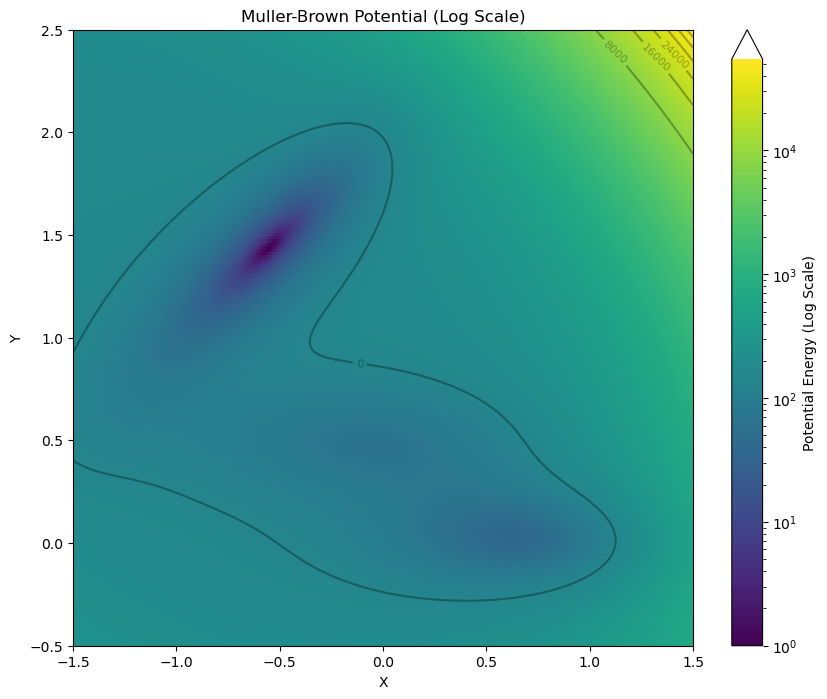

In [37]:
import numpy as np

def muller_brown_potential(x, y):
    A = [-200, -100, -170, 15]
    a = [-1, -1, -6.5, 0.7]
    b = [0, 0, 11, 0.6]
    c = [-10, -10, -6.5, 0.7]
    x0 = [1, 0, -0.5, -1]
    y0 = [0, 0.5, 1.5, 1]

    z = 0
    for i in range(4):
        z += A[i] * np.exp(a[i]*(x-x0[i])**2 + b[i]*(x-x0[i])*(y-y0[i]) + c[i]*(y-y0[i])**2)
    return z

def plot_muller_brown_potential_3d(resolution=100, view_angle=(30, 45)):
    x = np.linspace(-2, 2, resolution)
    y = np.linspace(-1, 3, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = muller_brown_potential(X[i, j], Y[i, j])

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential Energy')
    ax.set_title('Muller-Brown Potential')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    ax.view_init(elev=view_angle[0], azim=view_angle[1])
    
    plt.show()

# def plot_muller_brown_potential_2d(resolution=200, show_contours=True):
#     """
#     Create a 2D contour plot of the Muller-Brown potential.
    
#     Parameters:
#     resolution : int, optional
#         Number of points along each axis (default is 200)
#     show_contours : bool, optional
#         Whether to show contour lines (default is True)
#     """
#     x = np.linspace(-1.5, 1.5, resolution)
#     y = np.linspace(-0.5, 2.5, resolution)
#     X, Y = np.meshgrid(x, y)
#     Z = np.zeros_like(X)

#     for i in range(resolution):
#         for j in range(resolution):
#             Z[i, j] = muller_brown_potential(X[i, j], Y[i, j])

#     fig, ax = plt.subplots(figsize=(10, 8))
    
#     # Create a color plot

#     # Cap the values at 8000
#     Z_capped = np.minimum(Z, 700)
    
#     # Create a custom colormap with white for values above 8000
#     cmap = plt.get_cmap('viridis').copy()
#     cmap.set_over('white')

#     im = ax.imshow(Z_capped, extent=[-1.5, 1.5, -0.5, 2.5], origin='lower', 
#                    cmap=cmap, aspect='auto')
    
#     # Add contour lines if requested
#     if show_contours:
#         contours = ax.contour(X, Y, Z, colors='k', alpha=0.3)
#         ax.clabel(contours, inline=True, fontsize=8)
    
#     # Customize the plot
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_title('Muller-Brown Potential')
    
#     # Add a color bar
#     cbar = fig.colorbar(im, extend='max')
#     cbar.set_label('Potential Energy')
    
#     plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_muller_brown_potential_2d(resolution=200, show_contours=True):
    """
    Create a 2D contour plot of the Muller-Brown potential with a logarithmic colorbar.
    
    Parameters:
    resolution : int, optional
        Number of points along each axis (default is 200)
    show_contours : bool, optional
        Whether to show contour lines (default is True)
    """
    x = np.linspace(-1.5, 1.5, resolution)
    y = np.linspace(-0.5, 2.5, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = muller_brown_potential(X[i, j], Y[i, j])

    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Shift the potential to ensure all values are positive
    Z_shifted = Z - Z.min() + 1  # Add 1 to avoid log(0)
    
    # Cap the values at 700
    # Z_capped = np.minimum(Z_shifted, 700)
    
    # Create a custom colormap with white for values above 700
    cmap = plt.get_cmap('viridis').copy()
    cmap.set_over('white')

    # Use LogNorm for logarithmic scale
    norm = colors.LogNorm()

    im = ax.imshow(Z_shifted, extent=[-1.5, 1.5, -0.5, 2.5], origin='lower', 
                   cmap=cmap, norm=norm, aspect='auto')
    
    # Add contour lines if requested
    if show_contours:
        contours = ax.contour(X, Y, Z, colors='k', alpha=0.3)
        ax.clabel(contours, inline=True, fontsize=8)
    
    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Muller-Brown Potential (Log Scale)')
    
    # Add a color bar
    cbar = fig.colorbar(im, extend='max')
    cbar.set_label('Potential Energy (Log Scale)')
    
    plt.show()

# Example usage:
plot_muller_brown_potential_2d(resolution=200, show_contours=True)


# Example usage:
# plot_muller_brown_potential_3d(resolution=200, view_angle=(90, 0))


## Define the Bias Functions